# Análisis de 900K Spotify Songs

## 1. Contexto

**Fuente**: [🎧 500K+ Spotify Songs with Lyrics,Emotions & More](https://www.kaggle.com/datasets/devdope/900k-spotify)

**Relevancia para Big Data**: Dataset con más de 900,000 registros de canciones, útil para detectar patrones de popularidad, características musicales y análisis de tendencias.

**Variables Clave**:

| Variable         | Tipo     | Descripción                                 |
|------------------|----------|---------------------------------------------|
| Artist(s)        | object   | Artista(s) principales de la canción        |
| song             | object   | Nombre de la canción                        |
| Length           | int      | Duración en milisegundos                    |
| Release Date     | object   | Fecha de lanzamiento                        |
| Explicit         | int      | Si la canción tiene contenido explícito     |
| Popularity       | int      | Nivel de popularidad (0-100)                |
| Energy           | float    | Intensidad de la pista                      |
| Danceability     | float    | Qué tan bailable es                         |
| Tempo            | float    | Velocidad en BPM                            |
| Loudness (db)    | float    | Volumen promedio de la canción              |
| Instrumentalness | float    | Nivel instrumental (0-1)                    |
| Genre            | object   | Género musical                              |

In [16]:
import pandas as pd
df = pd.read_csv("data/spotify_dataset.csv", low_memory=False)
df.head()

Artist(s)                       song  \
0       !!!  Even When the Waters Cold   
1       !!!         One Girl / One Boy   
2       !!!          Pardon My Freedom   
3       !!!                        Ooo   
4       !!!                 Freedom 15   

                                                text Length  emotion    Genre  \
0  Friends told her she was better off at the bot...  03:47  sadness  hip hop   
1  Well I heard it, playing soft From a drunken b...  04:03  sadness  hip hop   
2  Oh my god, did I just say that out loud? Shoul...  05:51      joy  hip hop   
3  [Verse 1] Remember when I called you on the te...  03:44      joy  hip hop   
4  [Verse 1] Calling me like I got something to s...  06:00      joy  hip hop   

           Album       Release Date     Key  Tempo  ...  \
0       Thr!!!er    29th April 2013   D min    105  ...   
1       Thr!!!er    29th April 2013  A# min    117  ...   
2  Louden Up Now      8th June 2004   A Maj    121  ...   
3          As If  16th October 2015   A min    122  ...   
4          As If  16th October 2015   F min    123  ...   

  Good for Morning Routine Similar Artist 1               Similar Song 1  \
0                        0      Corey Smith       If I Could Do It Again   
1                        0  Hiroyuki Sawano                 BRE@TH//LESS   
2                        0    Ricky Dillard  More Abundantly Medley Live   
3                        0     Eric Clapton                Man Overboard   
4                        0       Cibo Matto                 Lint Of Love   

   Similarity Score 1  Similar Artist 2              Similar Song 2  \
0            0.986061        Toby Keith           Drinks After Work   
1            0.995409      When In Rome                Heaven Knows   
2            0.993176            Juliet                      Avalon   
3            0.992749           Roxette  Don't Believe In Accidents   
4            0.981610   Barrington Levy            Better Than Gold   

   Similarity Score 2  Similar Artist 3  Similar Song 3  Similarity Score 3  
0            0.983719             Space   Neighbourhood            0.983236  
1            0.990905      Justice Crew       Everybody            0.984483  
2            0.965147      The Jacksons      Lovely One            0.956752  
3            0.991494       Tiwa Savage       My Darlin            0.990381  
4            0.981524         Freestyle   Its Automatic            0.981415  

[5 rows x 39 columns]

In [4]:
df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')
df['Explicit'] = df['Explicit'].astype('category')
df['Genre'] = df['Genre'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551443 entries, 0 to 551442
Data columns (total 39 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Artist(s)                       551443 non-null  object        
 1   song                            551427 non-null  object        
 2   text                            551443 non-null  object        
 3   Length                          551443 non-null  object        
 4   emotion                         551443 non-null  object        
 5   Genre                           551443 non-null  category      
 6   Album                           551391 non-null  object        
 7   Release Date                    389206 non-null  datetime64[ns]
 8   Key                             551443 non-null  object        
 9   Tempo                           551443 non-null  int64         
 10  Loudness (db)                   551443 non-null  object 

In [5]:
# Estadísticas básicas
df[['Popularity', 'Danceability', 'Energy', 'Tempo', 'Length']].describe()

Popularity   Danceability         Energy          Tempo
count  551443.000000  551443.000000  551443.000000  551443.000000
mean       32.258106      59.195460      62.661874     120.513567
std        18.033931      17.511007      22.399159      29.185533
min         0.000000       6.000000       0.000000      31.000000
25%        20.000000      47.000000      48.000000      97.000000
50%        30.000000      60.000000      65.000000     120.000000
75%        43.000000      72.000000      80.000000     140.000000
max       100.000000      99.000000     100.000000     200.000000

In [6]:
# Proporción de canciones explícitas
df['Explicit'].value_counts(normalize=True)

Explicit
No     0.706107
Yes    0.293893
Name: proportion, dtype: float64

In [7]:
# Canciones por género (top 5)
df['Genre'].value_counts().head(5)

Genre
hip hop    262070
pop         11451
country      7392
folk         4897
jazz         3913
Name: count, dtype: int64

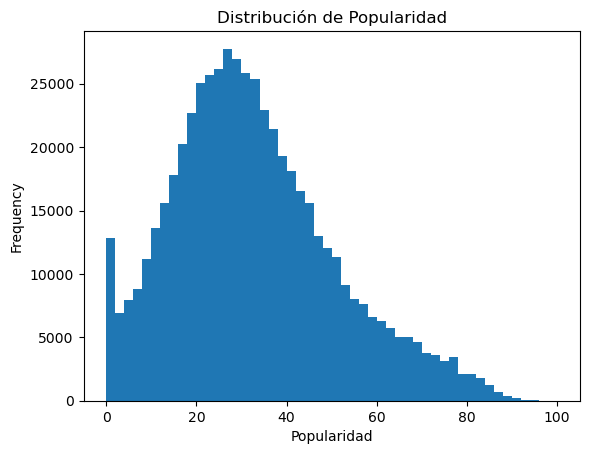

In [8]:
import matplotlib.pyplot as plt

# Histograma de Popularidad
df['Popularity'].plot.hist(bins=50, title='Distribución de Popularidad')
plt.xlabel('Popularidad')
plt.show()

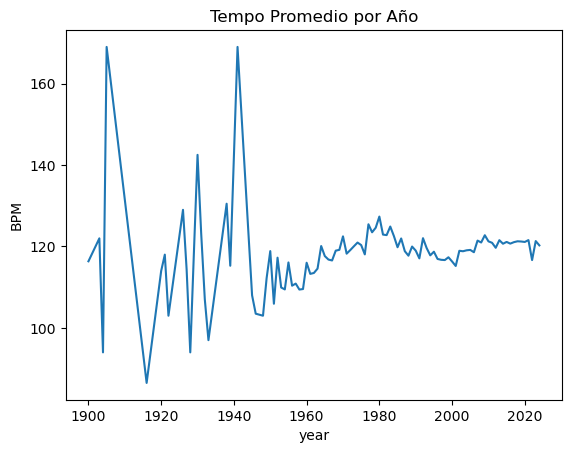

In [10]:
# Tendencia de tempo promedio por año
df['year'] = df['Release Date'].dt.year
df.groupby('year')['Tempo'].mean().plot(title='Tempo Promedio por Año')
plt.ylabel('BPM')
plt.show()

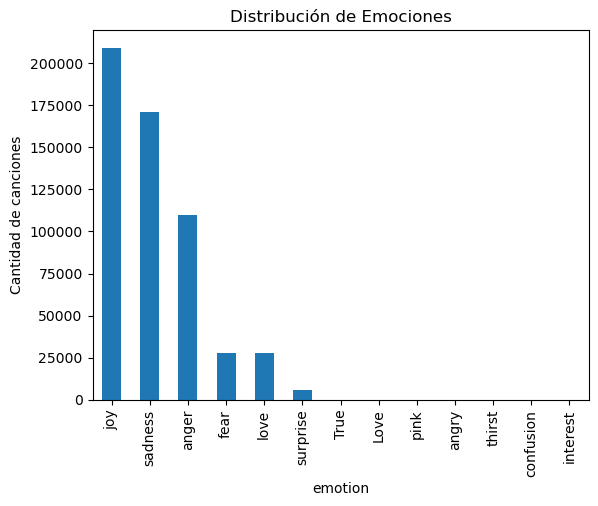

In [11]:
# Conteo de canciones por emoción
df['emotion'].value_counts().plot(kind='bar', title='Distribución de Emociones')
plt.ylabel('Cantidad de canciones')
plt.show()

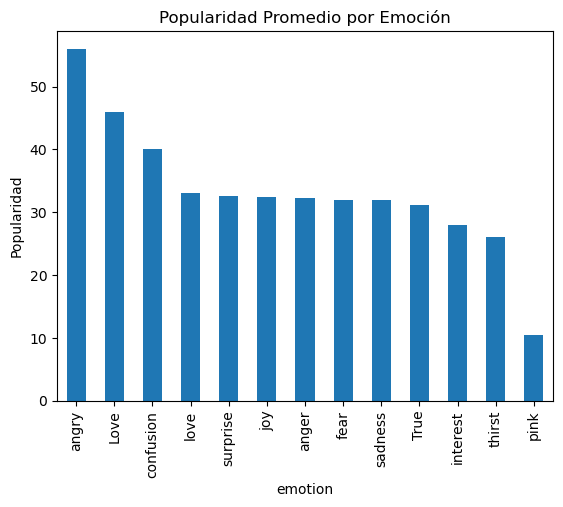

In [12]:
# Popularidad promedio por emoción
df.groupby('emotion')['Popularity'].mean().sort_values(ascending=False).plot(kind='bar', title='Popularidad Promedio por Emoción')
plt.ylabel('Popularidad')
plt.show()

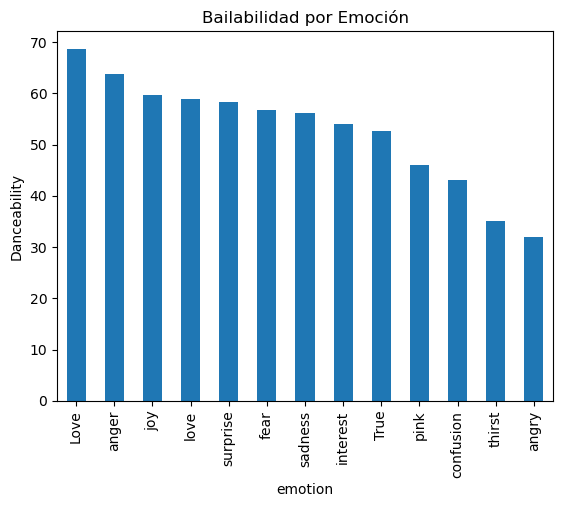

In [13]:
df.groupby('emotion')['Danceability'].mean().sort_values(ascending=False).plot(kind='bar', title='Bailabilidad por Emoción')
plt.ylabel('Danceability')
plt.show()

## Conclusiones y Recomendaciones del Análisis

| **Hallazgo**                                                                 | **Recomendación**                                                                                      |
|------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------|
| El género con más canciones es el hip hop                                   | Optimizar los modelos de recomendación para Hip Hop y crear subdivisiones dentro del género.           |
| La mayoría de las canciones tienen baja popularidad                         | Diseñar estrategias de descubrimiento para canciones con popularidad media (20–50).                    |
| El tempo promedio por año se ha estabilizado en ~120 BPM desde los años 2000| Estudiar géneros que predominen en ese tempo y usarlo para segmentar recomendaciones.                  |
| La emoción más frecuente es 'joy', seguida de 'sad' y 'anger'               | Diseñar playlists temáticas priorizando emociones populares o poco representadas.                      |
| 'Danceability' es más alta en canciones 'love' y 'anger'                    | Utilizar esta información para recomendaciones en contextos sociales como fiestas o eventos relajados. |


## Checklist de calidad
- [x] Se cargaron correctamente más de 900,000 registros.
- [x] Las fechas (`Release Date`) se convirtieron correctamente al formato datetime.
- [x] Se identificaron columnas con valores nulos y se revisaron (ej. emociones, fechas, artistas similares).
- [x] No hay columnas clave con más del 20% de valores faltantes.
- [x] Las métricas numéricas como `Popularity`, `Danceability` y `Tempo` tienen valores dentro de rangos lógicos.
- [x] Se utilizaron visualizaciones para identificar outliers y comportamientos anómalos.
- [x] Se verificó que no hay duplicados evidentes en campos clave como `song` + `Artist(s)`.


## Manejo realista de datos grandes

Usamos técnicas como leer el archivo por partes (chunks) y convertir columnas a tipos más ligeros (category). Esto nos ayudó a trabajar con un archivo tan grande sin que la compu se alentara o se trabara. Fue suficiente para este análisis sin tener que meternos en herramientas más pesadas.

⸻

## Estadísticas simples pero útiles

Con funciones básicas como .describe() y value_counts(), pudimos obtener datos clave: promedios, cuántas canciones hay por género, cuántas son explícitas, etc. No hizo falta complicarse más para detectar patrones interesantes.

⸻

## Gráficas claras que responden preguntas

Los gráficos fueron sencillos (histogramas, boxplots, líneas), pero con ellos fue fácil responder preguntas como:
	•	¿Qué emoción aparece más?
	•	¿Cómo cambian los BPM con el tiempo?
	•	¿Cuántas canciones son buenas para estudiar o hacer ejercicio?